In [3]:
import numpy as np
from matplotlib import pyplot as plt 

### Simulating competition and graphing it
We want to simulate how many intersections there are when two different groups select into the same body uniformly at random and graph it to see what the relationship is

In [20]:
# first we're going to check if our data is already simulated, if it is we will skip the next box :) since it takes 4 minutes
import os
filename = "conflict_simulation_1000.tsv"

sizes = [5,10,1000]
conflicts = {size:{} for size in sizes} # the inner list is indexed by tuples (first,second) representing the number selected, and the number will be the average number of conflicts
def import_tsv(filename):
    with open(filename, 'r', encoding="utf8") as f:
        lines = f.readlines()
        return lines
def process_lines_dict(lines):
    aDict = {}
    for line in lines:
        tup_val = line.strip('\n').split("\t")
        aDict[tup_val[0]] = tup_val[1]
    return aDict


if os.path.exists(filename):
    # import the files
    # to do this we have to generate each filename, and run a function that imports it
    # then save it into our dictionary in memory
    for size in sizes:
        filename = "conflict_simulation_"+str(size)+".tsv"
        lines = import_tsv(filename)
        # store the information in the dictionary
        conflicts[size] = process_lines_dict(lines)

#print(conflicts)

{5: {}, 10: {}, 1000: {}}


In [21]:




# we're going to generate random lists of length 0 to size with no replacement to represent indeces of selected objects and calculate the average number of conflicts

# if data files exist, we're not going to rerun simulation since it takes up to 4 minutes to run
if conflicts[1000] == {}:

    for possible in sizes:
        for first in range(possible+1): # first is the number of selsection of the first player
            for second in range(possible+1): # second is the number of selections of the second player
                results = []
                for i in range(1000):
                    sample_first = np.random.choice(possible, first, replace=False)
                    sample_second = np.random.choice(possible, second, replace=False)
                    # now we count the number of overlaps
                    
                    num_conflict = len(set(sample_first).intersection(set(sample_second)))
                    percent_conflict = num_conflict/possible
                    results.append(percent_conflict)
                first_percent = first/possible
                second_percent = second/possible
                conflicts[possible][(first_percent, second_percent)] = np.average(results)

    #print(conflicts)

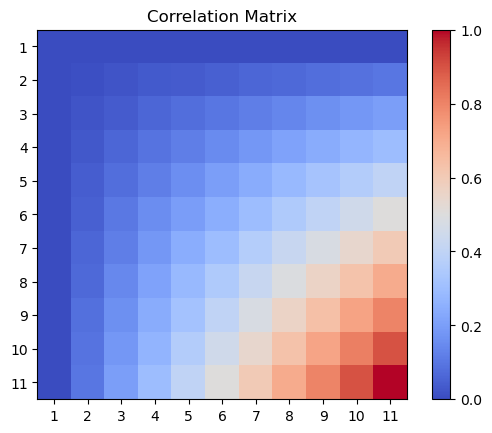

In [12]:
# in this box we generate a correlation matrix from the data
def generate_correlation_matrix(aDict):
    tuples = aDict.keys()
    size = int(np.sqrt(len(tuples)))
    matrix = np.zeros((size,size))
    for tup in tuples:
        #print(tup)
        #print(size)
        #print(tup[0]*(size-1), tup[1]*(size-1))
        matrix[int(tup[0]*(size-1))][int(tup[1]*(size-1))] = aDict[tup]
    #print(matrix)
    return matrix

correlation_matrix = generate_correlation_matrix(conflicts[10])

# Plot the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Customize the plot (optional)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))
plt.yticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))

# Display the plot
plt.show()

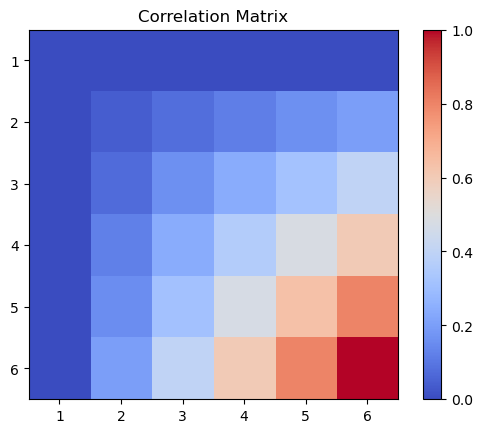

In [13]:
correlation_matrix = generate_correlation_matrix(conflicts[5])

# Plot the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Customize the plot (optional)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))
plt.yticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))

# Display the plot
plt.show()

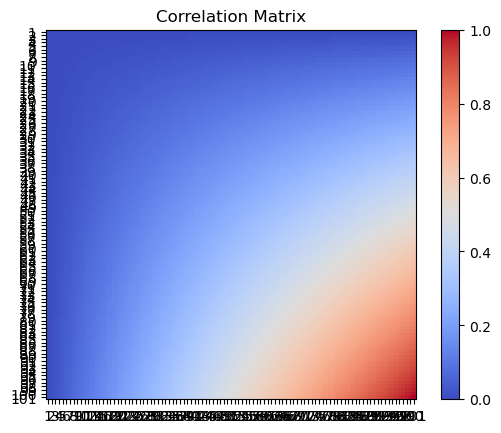

In [21]:
correlation_matrix = generate_correlation_matrix(conflicts[100])

# Plot the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Customize the plot (optional)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))
plt.yticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))

# Display the plot
plt.show()

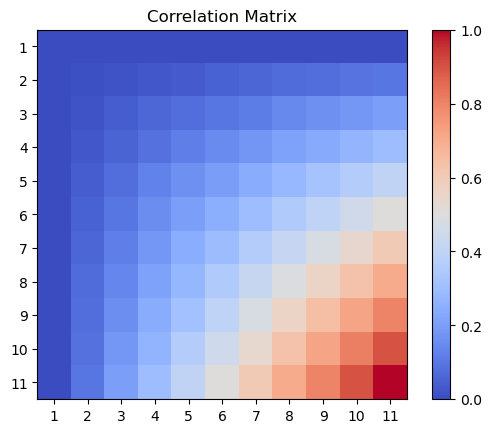

In [22]:
correlation_matrix = generate_correlation_matrix(conflicts[10])

# Plot the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Customize the plot (optional)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))
plt.yticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))

# Display the plot
plt.show()

In [17]:
# export data to csv so we don't have to run the whole thing again
import csv
def export_to_tsv(dictionary, filename):
    tuples = dictionary.keys()
    with open(filename, "w", encoding="utf8") as f:
        for tuple in tuples:
            row = "("+str(tuple[0])+","+str(tuple[1])+")" + "\t" + str(dictionary[tuple]) + "\n"
            f.write(row)

for size in sizes:
    export_to_tsv(conflicts[size], "conflict_simulation_"+str(size)+".tsv")
    

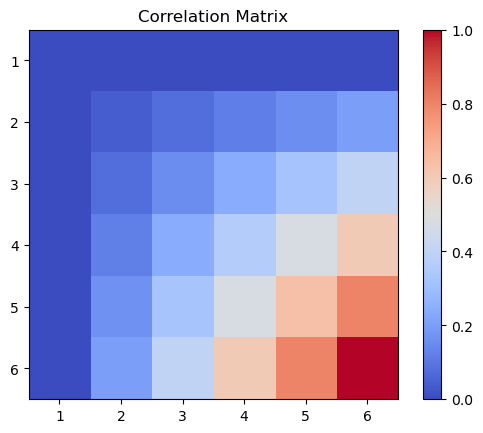

In [23]:
correlation_matrix = generate_correlation_matrix(conflicts[5])

# Plot the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Customize the plot (optional)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))
plt.yticks(range(len(correlation_matrix)), range(1, len(correlation_matrix) + 1))

# Display the plot
plt.show()